# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures 

import warnings
warnings.filterwarnings('ignore')

# Loading and Splitting the Ridge Regression Dataset 

In [2]:
# Load the training and test data from the ridge_regression train and test files
train_data_r = pd.read_csv('ridge_regression_train_data.csv')
test_data_r = pd.read_csv('ridge_regression_test_data.csv')

# Splitting the data into features (X) and target (y) for both training and test sets
x_train_r = train_data_r['x'].values.reshape(-1, 1)
y_train_r = train_data_r['y']
x_test_r = test_data_r['x'].values.reshape(-1, 1)
y_test_r = test_data_r['y']

print('Shape of x_train: ',x_train_r.shape)
print('Shape of y_train: ',y_train_r.shape)
print('Shape of x_test: ',x_test_r.shape)
print('Shape of y_test: ',y_test_r.shape)

Shape of x_train:  (69, 1)
Shape of y_train:  (69,)
Shape of x_test:  (30, 1)
Shape of y_test:  (30,)


# Evaluation Metric: RMSE and MAE

In [3]:
# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(np.mean((y_act - y_pred) ** 2)),
            "MAE": np.mean(np.abs(y_act - y_pred))
        },
        index=[0],
    )

# Our Ridge Regression - Closed Form Equation  

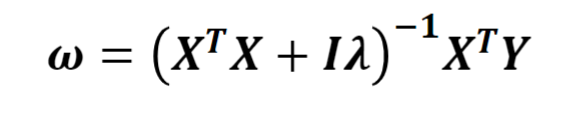

# Step 1: Ridge Regression Closed Form

In [4]:
class OurRidgeRegression(object):
    def __init__(self, lambda_reg=1.0):
        self.intercept_ = 0  # Bias
        self.coef_ = 0       # Weight
        self.lambda_reg = lambda_reg  # Regularization parameter

    def fit(self, x_train, y_train):
        """
        Ridge Regression Fitting Implementation : Closed Form Solution
        """
        #Adding a column of ones to include the intercept in the model
        x_train = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
        
        # Regularization matrix (lambda * I), excluding intercept term
        regularization_matrix = self.lambda_reg * np.eye(x_train.shape[1])
        regularization_matrix[0, 0] = 0  # No regularization for intercept

        # Ridge Regression Normal Equation: (X^TX + lambda*I)^-1(X^TY)
        prod1 = np.dot(x_train.T, y_train)  # X^TY
        prod2inv = np.linalg.pinv(np.dot(x_train.T, x_train) + regularization_matrix)
        weights = np.dot(prod2inv, prod1)  # (X^TX + lambda*I)^-1(X^TY)

        self.intercept_ = weights[0]
        self.coef_ = weights[1:]

    def predict(self, x_test):
        """
        Predict using the fitted line
        """
        # Handling case if x_test is a single feature array
        if x_test.ndim == 1:
            x_test = x_test.reshape(-1, 1)
        return np.dot(x_test, self.coef_) + self.intercept_


# Ridge Regression Closed Form Evaluation

In [5]:
print("Fitting Ridge Regression Model Closed Form")
ridge_reg_model_cl = OurRidgeRegression()
ridge_reg_model_cl.fit(x_train_r, y_train_r) # Fitting Ridge Regression Model Closed Form
print("\nRidge Regression Model Closed Form..........\n")
print("Intercept of the Ridge equation:", ridge_reg_model_cl.intercept_)
print("\nCoefficients of the equation are:", ridge_reg_model_cl.coef_)

# Checking model performance on train set
print("\nTraining Performance")
display(model_perf(ridge_reg_model_cl, x_train_r, y_train_r))

# Checking model performance on test set
print("\nTest Performance")
display(model_perf(ridge_reg_model_cl, x_test_r, y_test_r))

Fitting Ridge Regression Model Closed Form

Ridge Regression Model Closed Form..........

Intercept of the Ridge equation: 8.64769497886284

Coefficients of the equation are: [1.31054559]

Training Performance


,RMSE,MAE
0,10.370216,8.129273



Test Performance


,RMSE,MAE
0,10.36918,8.360239


# Ridge Regression Closed Form fitted line respect to training data

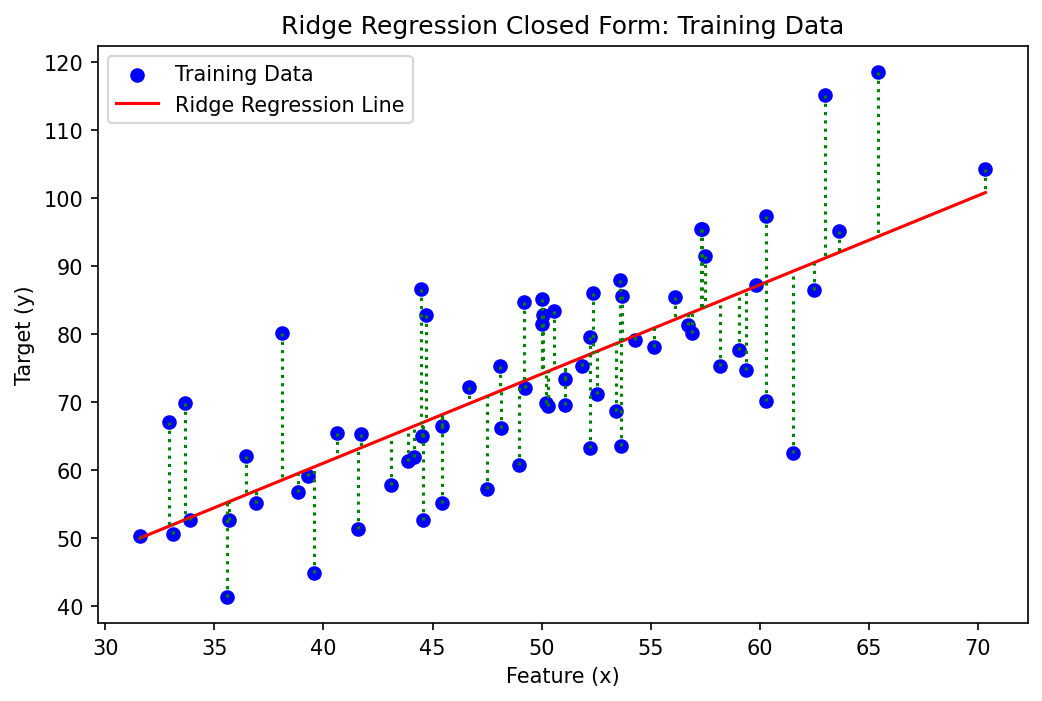

In [6]:
# Create a range of values for plotting the fitted line
x_plot_range = np.linspace(x_train_r.min(), x_train_r.max(), 100).reshape(-1, 1)
y_plot_range = ridge_reg_model_cl.predict(x_plot_range)

# Predictions for training data
y_train_pred = ridge_reg_model_cl.predict(x_train_r)

# Plotting the fitted line and training data
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(x_train_r, y_train_r, color='blue', label='Training Data')
plt.plot(x_plot_range, y_plot_range, color='red', label='Ridge Regression Line')

# Dotted lines for residuals
for x, y_real, y_pred in zip(x_train_r.flatten(), y_train_r, y_train_pred):
    plt.plot([x, x], [y_real, y_pred], color='green', linestyle='dotted')

plt.title('Ridge Regression Closed Form: Training Data')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()

# Save the graph to a file
plt.savefig('Ridge_Regression_Closed_Form', dpi=300)
plt.show()


# Ridge Regression Closed Form fitted line respect to test data

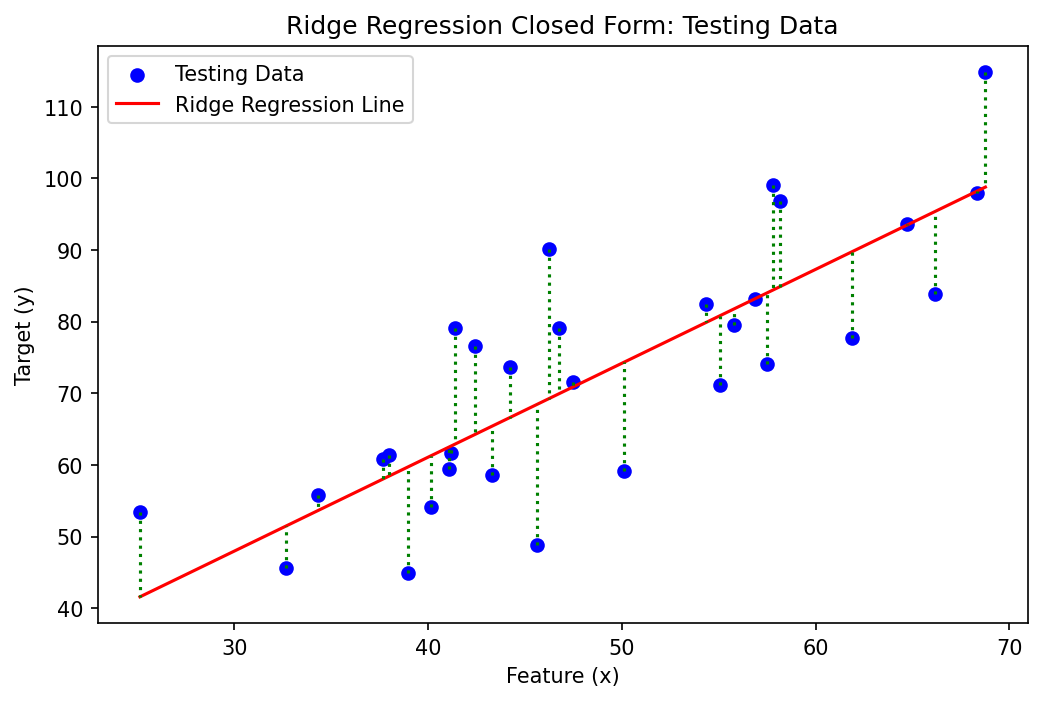

In [7]:
# Create a range of values for plotting the fitted line
x_plot_range = np.linspace(x_test_r.min(), x_test_r.max(), 100).reshape(-1, 1)
y_plot_range = ridge_reg_model_cl.predict(x_plot_range)

# Predictions for test data
y_test_pred = ridge_reg_model_cl.predict(x_test_r)

# Plotting the fitted line and test data
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(x_test_r, y_test_r, color='blue', label='Testing Data')
plt.plot(x_plot_range, y_plot_range, color='red', label='Ridge Regression Line')

# Dotted lines for residuals
for x, y_real, y_pred in zip(x_test_r.flatten(), y_test_r, y_test_pred):
    plt.plot([x, x], [y_real, y_pred], color='green', linestyle='dotted')

plt.title('Ridge Regression Closed Form: Testing Data')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

# Loading and Splitting the Polynomial Ridge Regression Dataset

In [8]:
# Load the training and test data from the Polynomial Ridge Regression train and test files 
train_data_p = pd.read_csv('polynomial_regression_train_data.csv')
test_data_p = pd.read_csv('polynomial_regression_test_data.csv')

# Splitting the data into features (X) and target (y) for both training and test sets
x_train_p = train_data_p['x'].values.reshape(-1, 1)
y_train_p = train_data_p['y']
x_test_p = test_data_p['x'].values.reshape(-1, 1)
y_test_p = test_data_p['y']

print('Shape of x_train: ',x_train_p.shape)
print('Shape of y_train: ',y_train_p.shape)
print('Shape of x_test: ',x_test_p.shape)
print('Shape of y_test: ',y_test_p.shape)

Shape of x_train:  (70, 1)
Shape of y_train:  (70,)
Shape of x_test:  (30, 1)
Shape of y_test:  (30,)


# Step 2: Polynomial Ridge Regression Closed Form

In [9]:
from sklearn.preprocessing import PolynomialFeatures
# Transform the features into polynomial features of the fifth degree
poly = PolynomialFeatures(degree=5)
x_train_poly = poly.fit_transform(x_train_p.reshape(-1, 1))
x_test_poly = poly.fit_transform(x_test_p.reshape(-1, 1))

ridge_reg_model_pl = OurRidgeRegression()
ridge_reg_model_pl.fit(x_train_poly, y_train_p)
print("\nPolynomial Ridge Regression Closed Form..........\n")
print("Intercept of the Ridge equation:", ridge_reg_model_pl.intercept_)
print("\nCoefficients of the equation are:", ridge_reg_model_pl.coef_)

# Checking model performance on train set
print("\nTraining Performance")
display(model_perf(ridge_reg_model_pl, x_train_poly, y_train_p))

# Checking model performance on test set
print("\nTest Performance")
display(model_perf(ridge_reg_model_pl, x_test_poly, y_test_p))


Polynomial Ridge Regression Closed Form..........

Intercept of the Ridge equation: 0.47405051773124995

Coefficients of the equation are: [-2.19238071e-07  1.37087157e+00 -1.13839503e+00  2.76200159e-01
 -2.62677658e-02  8.58622381e-04]

Training Performance


,RMSE,MAE
0,0.377542,0.312631



Test Performance


,RMSE,MAE
0,0.383954,0.322252


# Polynomial Ridge Regression Closed Form fitted line respect to train data

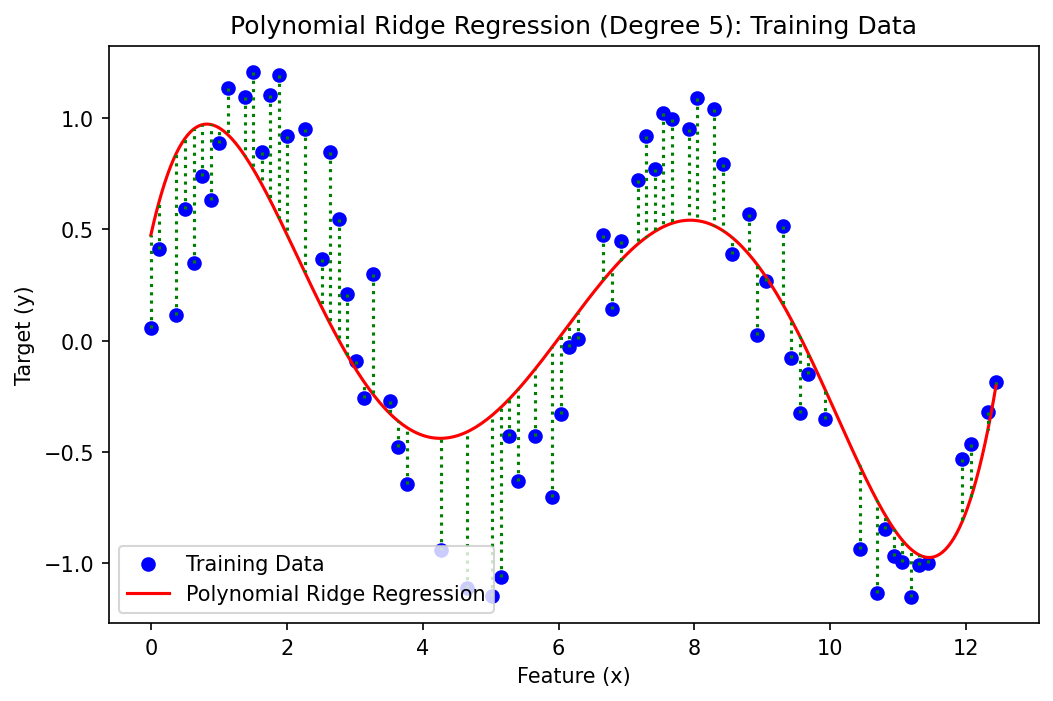

In [10]:
# Create a range of values for plotting the fitted line
x_plot = np.linspace(min(x_train_p), max(x_train_p), 300).reshape(-1, 1)
y_plot = ridge_reg_model_pl.predict(poly.fit_transform(x_plot))

# Predictions for train data
y_train_pred = ridge_reg_model_pl.predict(poly.fit_transform(x_train_p))

# Plotting the fitted line and train data
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(x_train_p, y_train_p, color='blue', label='Training Data')
plt.plot(x_plot, y_plot, color='red', label='Polynomial Ridge Regression')

# Dotted lines for residuals
for x, y_real, y_pred in zip(x_train_p.flatten(), y_train_p, y_train_pred):
    plt.plot([x, x], [y_real, y_pred], color='green', linestyle='dotted')

plt.title('Polynomial Ridge Regression (Degree 5): Training Data')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()

# Save the graph to a file
plt.savefig('Polynomial_Ridge_Regression_Degree_5)', dpi=300)
plt.show()


# Polynomial Ridge Regression Closed Form fitted line respect to test data

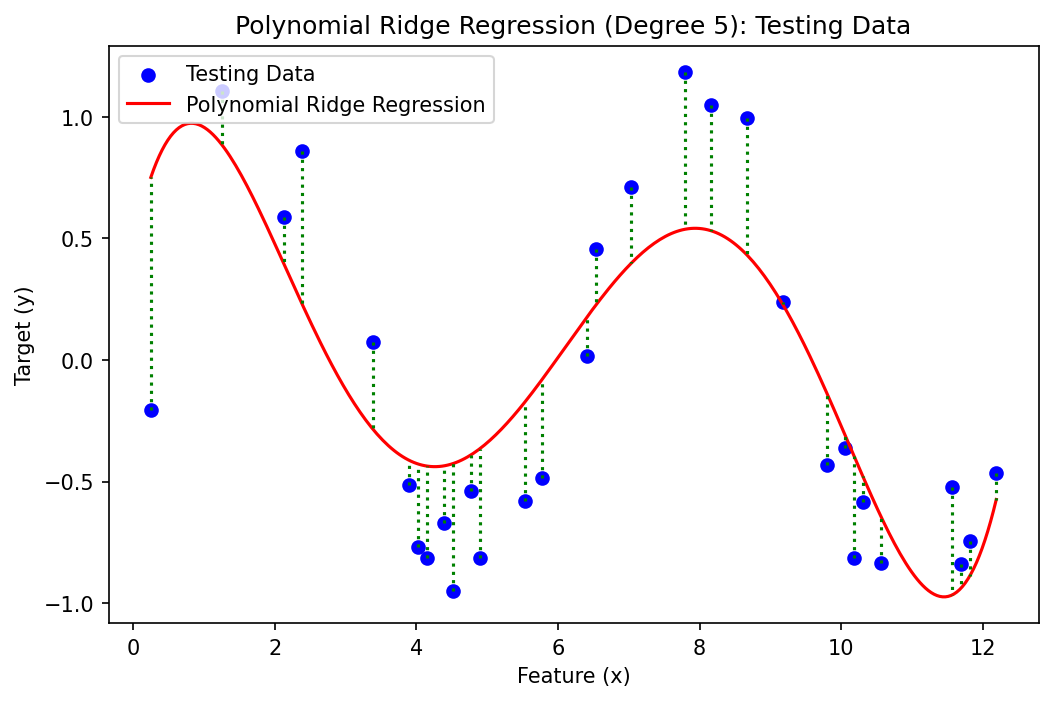

In [11]:
# Create a range of values for plotting the fitted line
x_plot = np.linspace(min(x_test_p), max(x_test_p), 300).reshape(-1, 1)
y_plot = ridge_reg_model_pl.predict(poly.fit_transform(x_plot))

# Predictions for train data
y_test_pred = ridge_reg_model_pl.predict(poly.fit_transform(x_test_p))

# Plotting the fitted line and train data
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(x_test_p, y_test_p, color='blue', label='Testing Data')
plt.plot(x_plot, y_plot, color='red', label='Polynomial Ridge Regression')

# Dotted lines for residuals
for x, y_real, y_pred in zip(x_test_p.flatten(), y_test_p, y_test_pred):
    plt.plot([x, x], [y_real, y_pred], color='green', linestyle='dotted')

plt.title('Polynomial Ridge Regression (Degree 5): Testing Data')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

# Step 3: Ridge Regression with Gradient Descent

In [12]:
class OurRidgeRegressionGD(object):
    def __init__(self, lambda_reg=1.0):
        self.intercept_ = 0  # Bias
        self.coef_ = 0       # Weight
        self.lambda_reg = lambda_reg  # Regularization parameter
        self.costs = []      # To store the cost at each iteration

    def fit(self, x_train, y_train, nepochs, learning_rate):
        """
        Ridge Regression Fitting Implementation : Gradient Descent
        """
        # Augmenting x_train with a column of ones for the intercept
        x_train = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
        y_train = np.array(y_train).reshape(-1, 1)
        weights = np.zeros((x_train.shape[1], 1))  # Initialize weights

        for epoch in range(nepochs):
            # Gradient computation
            predictions = np.dot(x_train, weights)
            errors = predictions - y_train
            gradient = np.dot(x_train.T, errors) / len(x_train)
            regularization = self.lambda_reg * weights / len(x_train)
            regularization[0] = 0  # No regularization for intercept
            gradient += regularization

            # Update weights
            weights -= learning_rate * gradient

            # Cost computation (including regularization)
            cost = np.mean(errors ** 2) + self.lambda_reg * np.sum(weights[1:] ** 2) / (2 * len(x_train))
            self.costs.append(cost)

        self.intercept_ = weights[0]
        self.coef_ = weights[1:].flatten()

    def predict(self, x_test):
        """
        Predict using the fitted ridge regression model
        """
        return np.dot(np.hstack([np.ones((x_test.shape[0], 1)), x_test]), np.insert(self.coef_, 0, self.intercept_))





Ridge Regression with Gradient Descent..........

Intercept of the Ridge Equation: [0.05620754]

Coefficients of the Equation are: [1.47934873]

Training Performance


,RMSE,MAE
0,10.481543,8.139421



Test Performance


,RMSE,MAE
0,10.666373,8.821046


<function matplotlib.pyplot.show(close=None, block=None)>

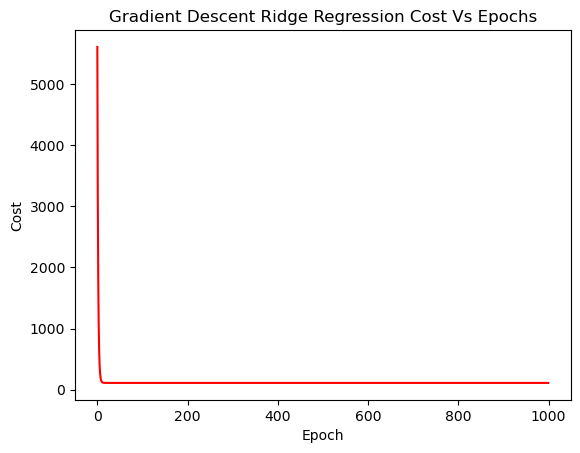

In [13]:
# Our own Fitting Linear model
nepochs=1000
learning_rate=0.0001
ridge_reg_model_gd = OurRidgeRegressionGD()
ridge_reg_model_gd.fit(x_train_r, y_train_r, nepochs, learning_rate)
print("\nRidge Regression with Gradient Descent..........\n")
print("Intercept of the Ridge Equation:", ridge_reg_model_gd.intercept_)
print("\nCoefficients of the Equation are:", ridge_reg_model_gd.coef_)

# Checking model performance on train set
print("\nTraining Performance")
display(model_perf(ridge_reg_model_gd, x_train_r, y_train_r))

# Checking model performance on test set
print("\nTest Performance")
display(model_perf(ridge_reg_model_gd, x_test_r, y_test_r))

# Plot Cost function w.r.t Epochs
plt.title('Gradient Descent Ridge Regression Cost Vs Epochs')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(range(len(ridge_reg_model_gd.costs)), ridge_reg_model_gd.costs, 'r-')
# Save the graph to a file
plt.savefig('Gradient_Descent_Ridge_Regression_cost)', dpi=300)
plt.show

# Gradient Descent Ridge Regression fitted line respect to train data

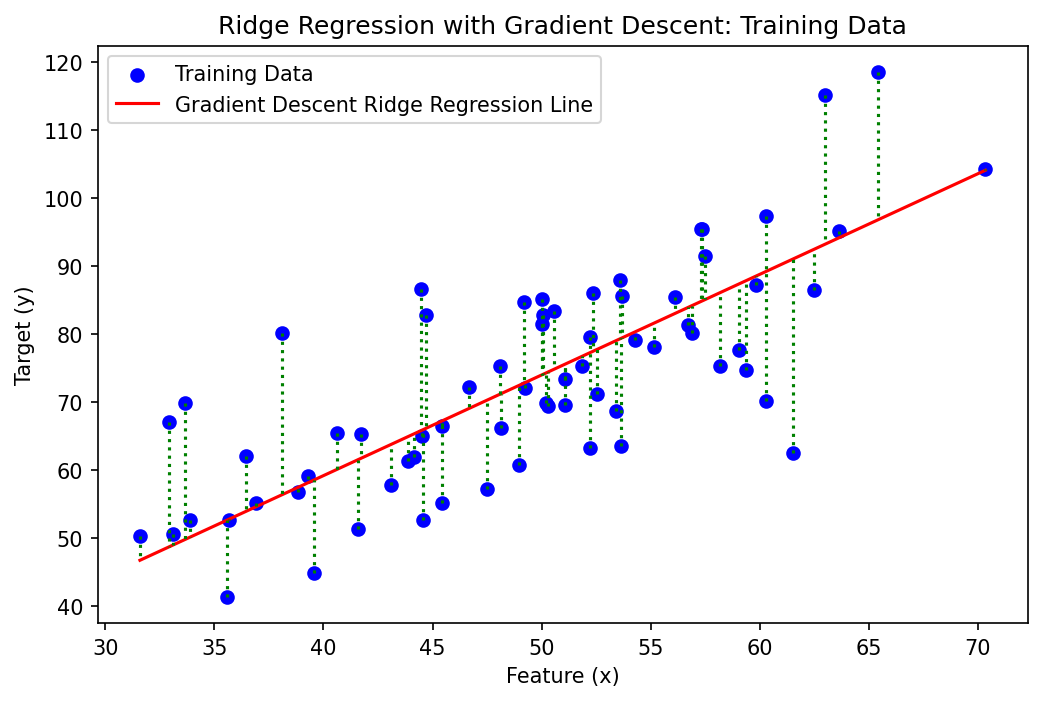

In [14]:
# Create a range of values for plotting the fitted line
x_plot_range = np.linspace(x_train_r.min(), x_train_r.max(), 100).reshape(-1, 1)
y_plot_range = ridge_reg_model_gd.predict(x_plot_range)

# Predictions for training data
y_train_pred = ridge_reg_model_gd.predict(x_train_r)

# Plotting the fitted line and training data
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(x_train_r, y_train_r, color='blue', label='Training Data')
plt.plot(x_plot_range, y_plot_range, color='red', label='Gradient Descent Ridge Regression Line')

# Dotted lines for residuals
for x, y_real, y_pred in zip(x_train_r.flatten(), y_train_r, y_train_pred):
    plt.plot([x, x], [y_real, y_pred], color='green', linestyle='dotted')

plt.title('Ridge Regression with Gradient Descent: Training Data')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()

# Save the graph to a file
plt.savefig('Gradient_Descent_Ridge_Regression)', dpi=300)
plt.show()

# Gradient Descent Ridge Regression fitted line respect to test data

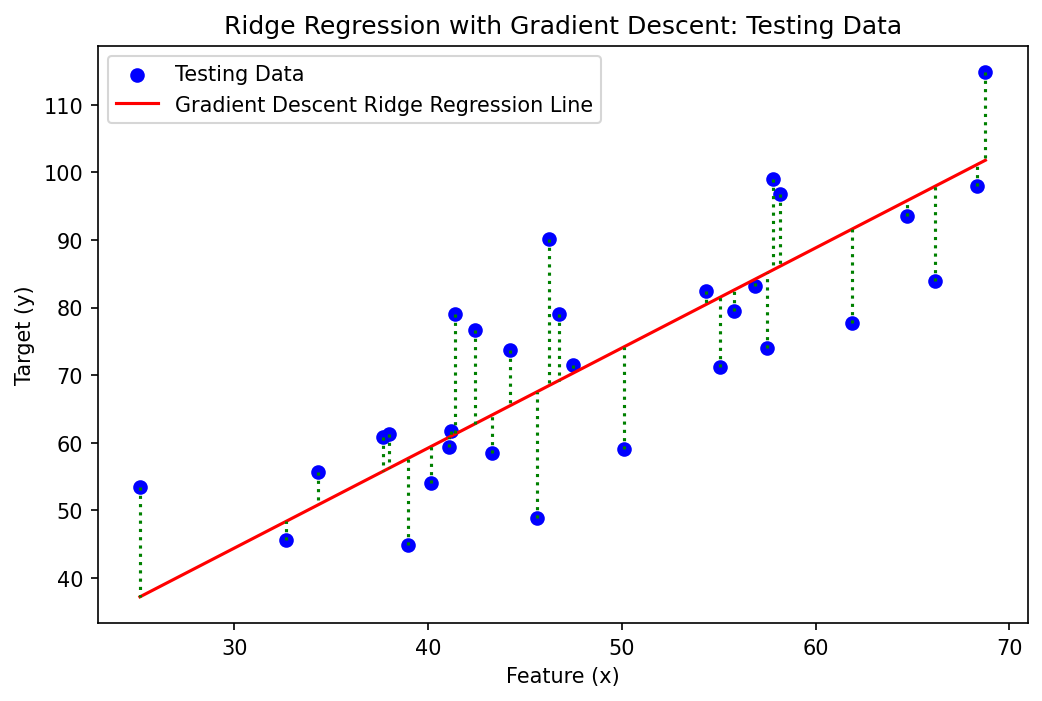

In [15]:
# Create a range of values for plotting the fitted line
x_plot_range = np.linspace(x_test_r.min(), x_test_r.max(), 100).reshape(-1, 1)
y_plot_range = ridge_reg_model_gd.predict(x_plot_range)

# Predictions for training data
y_test_pred = ridge_reg_model_gd.predict(x_test_r)

# Plotting the fitted line and training data
plt.figure(figsize=(8, 5), dpi=150)
plt.scatter(x_test_r, y_test_r, color='blue', label='Testing Data')
plt.plot(x_plot_range, y_plot_range, color='red', label='Gradient Descent Ridge Regression Line')

# Dotted lines for residuals
for x, y_real, y_pred in zip(x_test_r.flatten(), y_test_r, y_test_pred):
    plt.plot([x, x], [y_real, y_pred], color='green', linestyle='dotted')

plt.title('Ridge Regression with Gradient Descent: Testing Data')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

# Step 4: Exact Line Search

In [16]:
import numpy as np

class OurRidgeRegressionELS(object):
    def __init__(self, lambda_reg=1.0):
        self.intercept_ = 0  # Bias
        self.coef_ = None    # Weight
        self.lambda_reg = lambda_reg  # Regularization parameter
        self.costs = []      # To store the cost at each iteration

    def _compute_cost(self, x, y, weights):
        """
        Compute the Ridge Regression cost function
        """
        predictions = np.dot(x, weights)
        errors = predictions - y
        cost = np.mean(errors ** 2) + self.lambda_reg * np.sum(weights[1:] ** 2) / (2 * len(x))
        return cost

    def fit(self, x_train, y_train, nepochs, learning_rate):
        """
        Ridge Regression Fitting Implementation : Gradient Descent with Exact Line Search
        """
        x_train = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
        y_train = np.array(y_train).reshape(-1, 1)
        weights = np.zeros((x_train.shape[1], 1))  # Initialize weights

        for epoch in range(nepochs):
            predictions = np.dot(x_train, weights)
            errors = predictions - y_train
            gradient = np.dot(x_train.T, errors) / len(x_train)
            regularization = self.lambda_reg * weights / len(x_train)
            regularization[0] = 0  # No regularization for intercept
            gradient += regularization

            # Exact line search - find optimal learning rate
            best_lr = learning_rate
            min_cost = self._compute_cost(x_train, y_train, weights)
            for lr in np.linspace(learning_rate / 10, learning_rate * 10, 100):
                new_weights = weights - lr * gradient
                new_cost = self._compute_cost(x_train, y_train, new_weights)
                if new_cost < min_cost:
                    min_cost = new_cost
                    best_lr = lr

            # Update weights using the best learning rate found
            weights -= best_lr * gradient
            self.costs.append(min_cost)

        self.intercept_ = weights[0, 0]
        self.coef_ = weights[1:].flatten()

    def predict(self, x_test):
        """
        Predict using the fitted ridge regression model
        """
        return np.dot(np.hstack([np.ones((x_test.shape[0], 1)), x_test]), np.insert(self.coef_, 0, self.intercept_))



Ridge Regression Exact Line Search..........

Intercept of the Ridge Equation: 0.25186023052966744

Coefficients of the Equation are: [1.47541664]

Training Performance


,RMSE,MAE
0,10.47655,8.13589



Test Performance


,RMSE,MAE
0,10.656006,8.808664


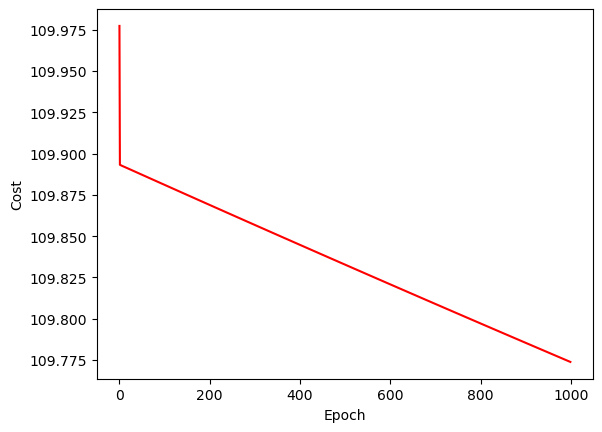

In [17]:
# Our own Fitting Linear model
nepochs=1000
learning_rate=0.0001
ridge_reg_model_els = OurRidgeRegressionELS()
ridge_reg_model_els.fit(x_train_r, y_train_r, nepochs, learning_rate)
print("\nRidge Regression Exact Line Search..........\n")
print("Intercept of the Ridge Equation:", ridge_reg_model_els.intercept_)
print("\nCoefficients of the Equation are:", ridge_reg_model_els.coef_)

# Checking model performance on train set
print("\nTraining Performance")
display(model_perf(ridge_reg_model_els, x_train_r, y_train_r))

# Checking model performance on test set
print("\nTest Performance")
display(model_perf(ridge_reg_model_els, x_test_r, y_test_r))

# Plot Cost function w.r.t Epochs
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(range(len(ridge_reg_model_els.costs)), ridge_reg_model_els.costs, 'r-')



# Alternative - Exact Line Search

In [18]:
import numpy as np
from scipy.optimize import minimize_scalar

class OurRidgeRegressionELS(object):
    def __init__(self, lambda_reg=1.0):
        self.intercept_ = 0  # Bias
        self.coef_ = None    # Weight
        self.lambda_reg = lambda_reg  # Regularization parameter
        self.costs = []      # To store the cost at each iteration

    def _compute_cost(self, x, y, weights):
        """
        Compute the Ridge Regression cost function
        """
        predictions = np.dot(x, weights)
        errors = predictions - y
        cost = np.mean(errors ** 2) + self.lambda_reg * np.sum(weights[1:] ** 2) / (2 * len(x))
        return cost

    def fit(self, x_train, y_train, nepochs):
        """
        Ridge Regression Fitting Implementation: Gradient Descent with Exact Line Search
        """
        # Adding a column of ones to include the bias term in the weights
        x_train = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
        y_train = np.array(y_train).reshape(-1, 1)
        weights = np.zeros((x_train.shape[1], 1))  # Initialize weights

        for epoch in range(nepochs):
            predictions = np.dot(x_train, weights)
            errors = predictions - y_train
            gradient = np.dot(x_train.T, errors) / len(x_train)
            regularization = self.lambda_reg * weights / len(x_train)
            regularization[0] = 0  # No regularization for the intercept
            gradient += regularization

            # Objective function for the line search: C(w - alpha * grad(C(w)))
            def objective(alpha):
                return self._compute_cost(x_train, y_train, weights - alpha * gradient)

            # Perform exact line search using minimize_scalar
            result = minimize_scalar(objective)
            optimal_alpha = result.x

            # Update weights using the optimal alpha found
            weights -= optimal_alpha * gradient
            cost = self._compute_cost(x_train, y_train, weights)
            self.costs.append(cost)

        self.intercept_ = weights[0, 0]
        self.coef_ = weights[1:].flatten()

    def predict(self, x_test):
        """
        Predict using the fitted ridge regression model
        """
        x_test = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)
        return np.dot(x_test, np.insert(self.coef_, 0, self.intercept_))

# Example usage:
# Initialize the Ridge Regression model with Exact Line Search
# model = OurRidgeRegressionELS(lambda_reg=0.1)
# model.fit(x_train, y_train, nepochs=1000)
# predictions = model.predict(x_test)



Ridge Regression Exact Line Search..........

Intercept of the Ridge Equation: 8.203871659055508

Coefficients of the Equation are: [1.31924076]

Training Performance


,RMSE,MAE
0,10.370499,8.119016



Test Performance


,RMSE,MAE
0,10.376243,8.373983


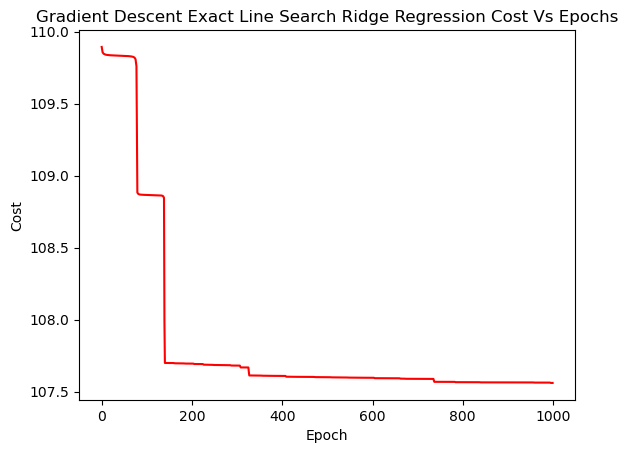

In [19]:
# Our own Fitting Linear model
nepochs=1000
learning_rate=0.0001
ridge_reg_model_els = OurRidgeRegressionELS()
ridge_reg_model_els.fit(x_train_r, y_train_r, nepochs)
print("\nRidge Regression Exact Line Search..........\n")
print("Intercept of the Ridge Equation:", ridge_reg_model_els.intercept_)
print("\nCoefficients of the Equation are:", ridge_reg_model_els.coef_)

# Checking model performance on train set
print("\nTraining Performance")
display(model_perf(ridge_reg_model_els, x_train_r, y_train_r))

# Checking model performance on test set
print("\nTest Performance")
display(model_perf(ridge_reg_model_els, x_test_r, y_test_r))

# Plot Cost function w.r.t Epochs
plt.title('Gradient Descent Exact Line Search Ridge Regression Cost Vs Epochs')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(range(len(ridge_reg_model_els.costs)), ridge_reg_model_els.costs, 'r-')

# Save the graph to a file
plt.savefig('exact_line_search.png', dpi=300)

# display the plot in your script as well
plt.show()